In [1]:
from pandas import read_html

In [2]:
filename = 'population.html'
tables = read_html(filename,
                   header=0,
                   index_col=0,
                   decimal='M')

In [3]:
tables

[                              1400       1500       1600       1700  \
 Year                                                                  
 population(in billions)  0.35–0.40  0.43–0.50  0.50–0.58  0.60–0.68   
 growth p.a.[1]                 >0%     <0.12%  0.15–0.3%  0.1–0.15%   
 
                               1800       1900       2000      2100  
 Year                                                                
 population(in billions)  0.89–0.98  1.56–1.71  6.06–6.15  c. 10–13  
 growth p.a.[1]            0.3–0.5%   0.5–0.6%   1.3–1.4%  0.7–0.8%  ,
        PRB(1973–2016)[15]  UN(2015)[16] Maddison(2008)[17] HYDE(2010)[18]  \
 Year                                                                        
 −10000                NaN           NaN                NaN         2M[25]   
 −9000                 NaN           NaN                NaN             4.   
 −8000                  5.           NaN                NaN             5.   
 −7000                  7.           Na

In [4]:
table2 = tables[2]
table2.head()

,United States Census Bureau (2017)[29],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[25],Tanton (1994)[19],Biraben (1980)[20],McEvedy & Jones (1978)[21],Thomlinson (1975)[22],Durand (1974)[23],Clark (1967)[24]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
table2.columns = ['census', 'prb', 'un', 'maddison',
'hyde', 'tanton', 'biraben', 'mj',
'thomlinson', 'durand', 'clark']

In [6]:
census = table2['census']/1e9

In [7]:
census.tail()

Year
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: census, dtype: float64

In [8]:
un = table2['un']/1e9
un.tail()

Year
2012    7.080072
2013    7.162119
2014    7.243784
2015    7.349472
2016         NaN
Name: un, dtype: float64

In [9]:
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year', ylabel='World population (billions)')

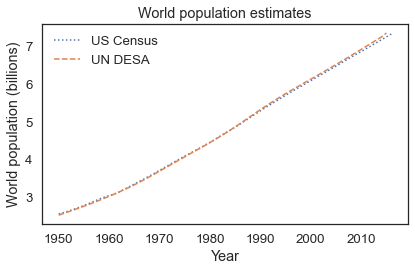

In [14]:
from modsim import *
plot_estimates()
decorate(title='World population estimates')

In [15]:
from numpy import abs
abs_error = abs(un-census)
abs_error.tail()

Year
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
dtype: float64

In [16]:
from numpy import mean
mean(abs_error)

0.029034508242424265

In [17]:
max(abs_error)

0.10157921199999986

In [18]:
rel_error = 100*abs_error/census
rel_error.tail()

Year
2012    0.943860
2013    0.986888
2014    1.029514
2015    1.401500
2016         NaN
dtype: float64

In [19]:
mean(rel_error)

0.5946585816022846

In [21]:
total_growth = census[2016] - census[1950]

In [22]:
elapsed_time = census.index[-1] - census.index[0]

In [25]:
p_0 = census[census.index[0]]
p_end = census[census.index[-1]]

In [26]:
annual_growth = total_growth/elapsed_time

In [27]:
annual_growth

0.07224800083333333

In [28]:
results = TimeSeries()

In [31]:
results[census.index[0]] = p_0
results

,values
1950,2.557629


In [33]:
for t in range(census.index[0], census.index[-1]):
    results[t+1] = results[t] + annual_growth

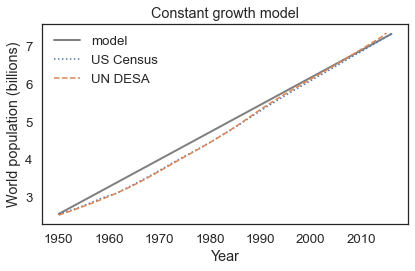

In [36]:
results.plot(color='gray', label='model')
plot_estimates()
decorate(title='Constant growth model')